# Comparison between L2 and L1 (Lasso) regularization

## Import libreries and define global variables

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from NeuralNetwork import NeuralNetwork
from utils import get_data, onehot_encoding, grid_search, save_dict_to_file, load_dict_from_file
from Layer import Layer, Input
from functions import accuracy, MSE, MEE
import pandas as pd

In [19]:
DIR = '/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/' # Directory of the package.

## Import datasets

### Import MONK datasets

In [20]:
df = get_data(f'{DIR}data/MONK/monks-3.train')
df_test = get_data(f'{DIR}data/MONK/monks-3.test')

X_train_monk, y_train_monk = df.drop(columns=['target','id']).to_numpy().T, df['target'].apply(lambda x: int(x)).to_numpy().T
X_test_monk, y_test_monk = df_test.drop(columns=['target','id']).to_numpy().T, df_test['target'].apply(lambda x: int(x)).to_numpy().T

### Import CUP dataset

Define the fraction of dataset which will represent the internal test set.

In [21]:
test_frac = 1/4

In [22]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv(f"{DIR}data/ML-CUP23-TR.csv", names=names, comment='#')

targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

df = df.sample(frac=1)

train_test_div = round((1-test_frac) * df.shape[0])

X_train_cup, y_train_cup = df[:train_test_div][features].to_numpy().T, df[:train_test_div][targets].to_numpy().T
X_test_cup, y_test_cup = df[train_test_div:][features].to_numpy().T, df[train_test_div:][targets].to_numpy().T

## Data preprocessing

### MONK preprocessing

Process one hot encoding on training and test sets.

In [23]:
X_train_monk = onehot_encoding(X_train_monk)
X_test_monk = onehot_encoding(X_test_monk)

### CUP preprocessing

Decide which data preprocessing method apply to cup training set:
+ MinMax normalization (preprocessing = 1)
+ Standardization (preprocessing = 2)

In [24]:
preprocessing = 0

In [25]:
if preprocessing == 1:
    X_train_cup = minmax_norm(X_train_cup)
    X_test_cup = minmax_norm(X_test_cup)
elif preprocessing == 2:
    X_train_cup = standard(X_train_cup)
    X_test_cup = standard(X_test_cup)

## MONK

Define training and model hyperparameters

In [26]:
orig_params = {'hidden_dim': 4,
        'hidden_act_func': 'tanh',
        'eta': 0.2,
        'lam': 0.00005,
        'alpha': 0.05,
        'n_batch': 97,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500
        }

### L2 regularization

Build model

In [27]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'), init_weights_mode='rand')
output_layer = Layer(hidden_layer, 1, 'sigm', init_weights_mode='rand')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

init_weights_list = model.get_initial_weights_list()

Training with L2 regularization:

In [28]:
#np.random.seed(42)
params['l1_reg'] = False
history_l2 = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )

Epoch 0: train_loss: 6.451e-01, val_loss: 7.510e-01; train_accuracy: 5.567e+01, val_accuracy: 4.400e+01  train_MSE: 2.276e-01, val_MSE: 2.781e-01  lr : 0.2
Epoch 1: train_loss: 6.300e-01, val_loss: 7.365e-01; train_accuracy: 5.773e+01, val_accuracy: 4.400e+01  train_MSE: 2.200e-01, val_MSE: 2.712e-01  lr : 0.2
Epoch 2: train_loss: 6.169e-01, val_loss: 7.243e-01; train_accuracy: 6.289e+01, val_accuracy: 4.800e+01  train_MSE: 2.135e-01, val_MSE: 2.654e-01  lr : 0.2
Epoch 3: train_loss: 6.055e-01, val_loss: 7.141e-01; train_accuracy: 7.320e+01, val_accuracy: 4.800e+01  train_MSE: 2.077e-01, val_MSE: 2.604e-01  lr : 0.2
Epoch 4: train_loss: 5.953e-01, val_loss: 7.054e-01; train_accuracy: 7.423e+01, val_accuracy: 5.200e+01  train_MSE: 2.026e-01, val_MSE: 2.561e-01  lr : 0.2
Epoch 5: train_loss: 5.860e-01, val_loss: 6.978e-01; train_accuracy: 7.732e+01, val_accuracy: 5.200e+01  train_MSE: 1.980e-01, val_MSE: 2.523e-01  lr : 0.2
Epoch 6: train_loss: 5.775e-01, val_loss: 6.911e-01; train_accur

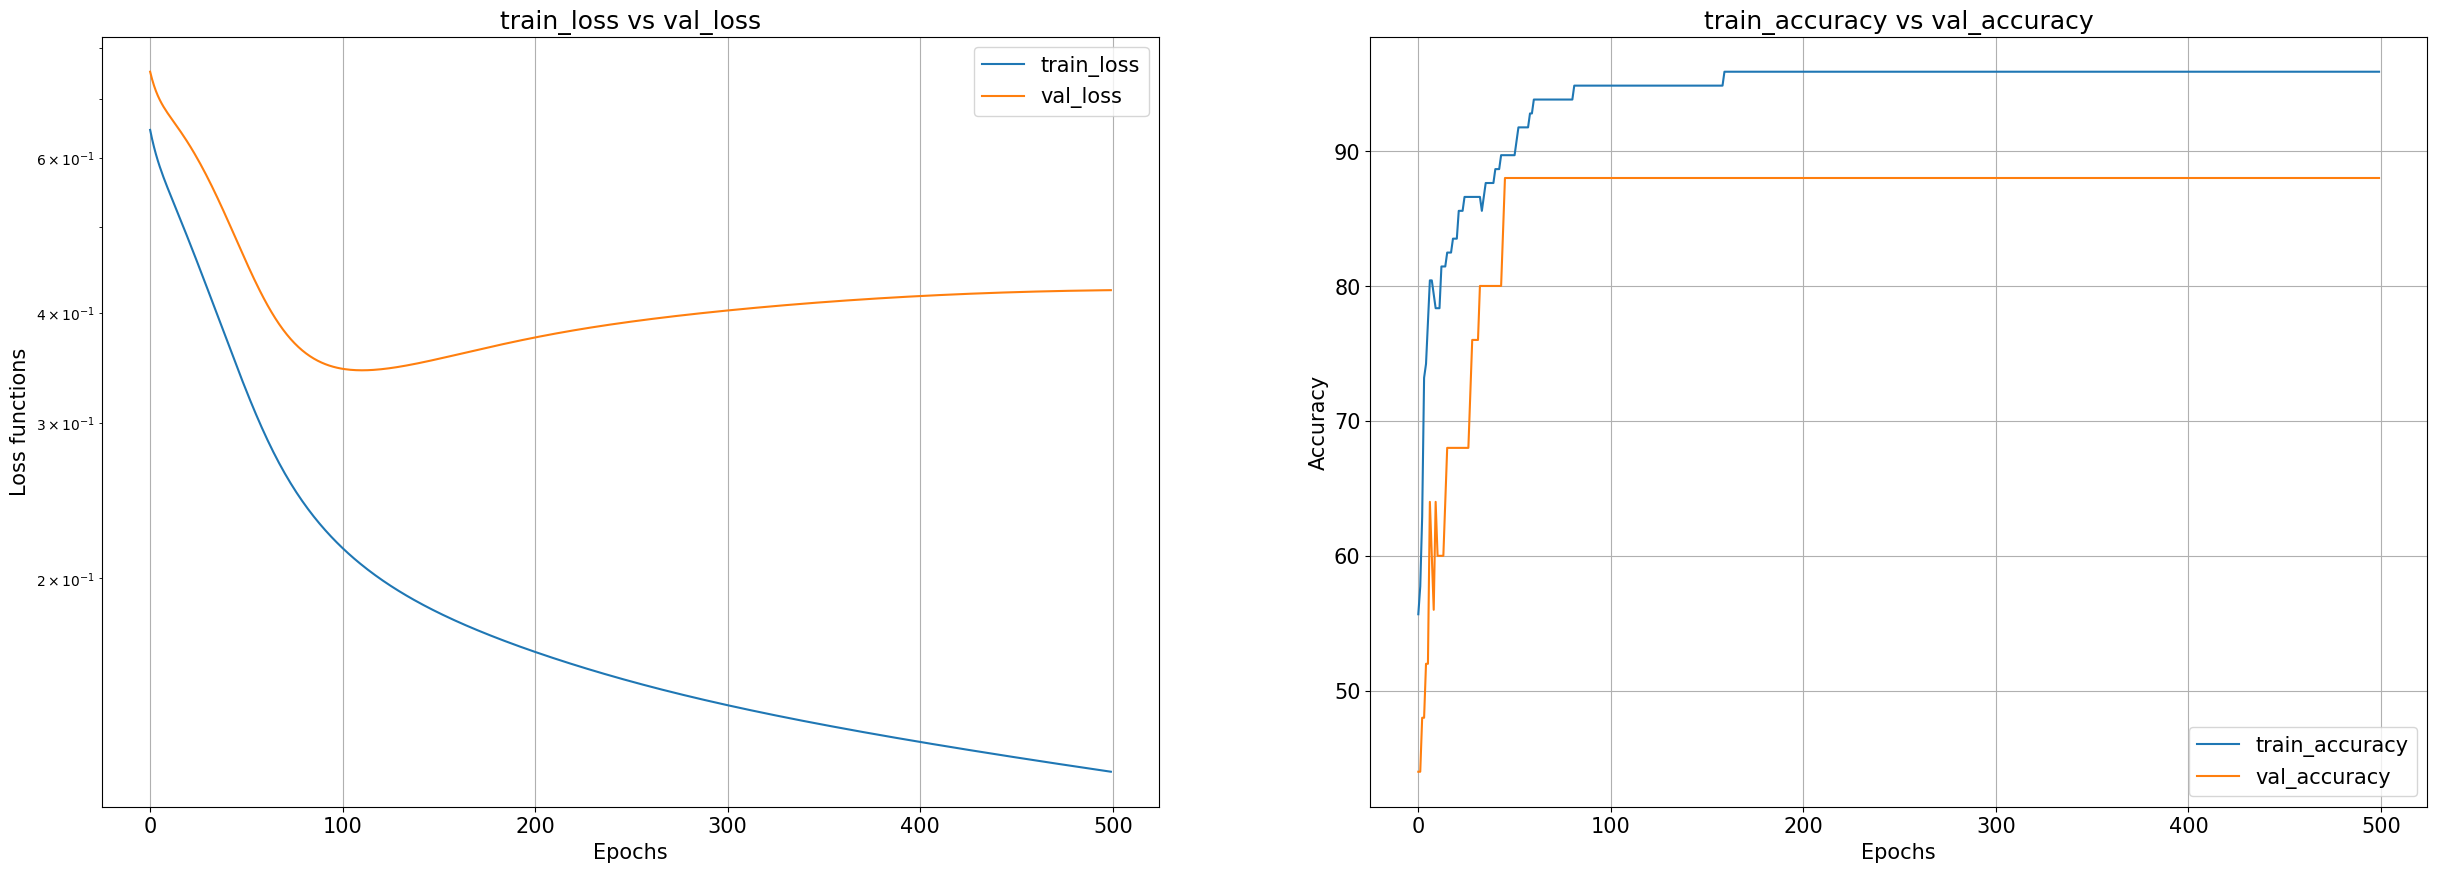

In [29]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l2['train_loss'],label='train_loss')
plt.plot(history_l2['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l2['train_accuracy'],label='train_accuracy')
plt.plot(history_l2['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### L1 regularization


Build model


In [30]:
params = orig_params.copy()
input_layer = Input(17)
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
output_layer = Layer(hidden_layer, 1, 'sigm')

model = NeuralNetwork(input_layer, output_layer, loss = 'binary_crossentropy', metrics = [accuracy, MSE])

model.set_initial_weights(init_weights_list)
arr = model.get_initial_weights_list()

Training with L1 regularization:


In [31]:
#np.random.seed(42)
params['l1_reg'] = True
history_l1 = model.train(X_train_monk, y_train_monk.reshape((1,X_train_monk.shape[1])),
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None,
                                    **params
                                    )


Epoch 0: train_loss: 6.661e-01, val_loss: 6.651e-01; train_accuracy: 5.155e+01, val_accuracy: 6.000e+01  train_MSE: 2.375e-01, val_MSE: 2.371e-01  lr : 0.2
Epoch 1: train_loss: 6.497e-01, val_loss: 6.529e-01; train_accuracy: 5.464e+01, val_accuracy: 6.000e+01  train_MSE: 2.294e-01, val_MSE: 2.311e-01  lr : 0.2
Epoch 2: train_loss: 6.359e-01, val_loss: 6.429e-01; train_accuracy: 6.186e+01, val_accuracy: 6.000e+01  train_MSE: 2.225e-01, val_MSE: 2.261e-01  lr : 0.2
Epoch 3: train_loss: 6.240e-01, val_loss: 6.343e-01; train_accuracy: 6.804e+01, val_accuracy: 6.400e+01  train_MSE: 2.165e-01, val_MSE: 2.218e-01  lr : 0.2
Epoch 4: train_loss: 6.137e-01, val_loss: 6.270e-01; train_accuracy: 7.320e+01, val_accuracy: 6.800e+01  train_MSE: 2.113e-01, val_MSE: 2.181e-01  lr : 0.2
Epoch 5: train_loss: 6.045e-01, val_loss: 6.204e-01; train_accuracy: 7.629e+01, val_accuracy: 7.200e+01  train_MSE: 2.068e-01, val_MSE: 2.148e-01  lr : 0.2
Epoch 6: train_loss: 5.962e-01, val_loss: 6.145e-01; train_accur

Epoch 31: train_loss: 4.419e-01, val_loss: 4.679e-01; train_accuracy: 8.866e+01, val_accuracy: 8.400e+01  train_MSE: 1.323e-01, val_MSE: 1.449e-01  lr : 0.2
Epoch 32: train_loss: 4.360e-01, val_loss: 4.618e-01; train_accuracy: 8.866e+01, val_accuracy: 8.400e+01  train_MSE: 1.298e-01, val_MSE: 1.424e-01  lr : 0.2
Epoch 33: train_loss: 4.301e-01, val_loss: 4.558e-01; train_accuracy: 8.969e+01, val_accuracy: 8.400e+01  train_MSE: 1.272e-01, val_MSE: 1.399e-01  lr : 0.2
Epoch 34: train_loss: 4.242e-01, val_loss: 4.498e-01; train_accuracy: 8.866e+01, val_accuracy: 8.400e+01  train_MSE: 1.247e-01, val_MSE: 1.374e-01  lr : 0.2
Epoch 35: train_loss: 4.184e-01, val_loss: 4.440e-01; train_accuracy: 8.866e+01, val_accuracy: 8.400e+01  train_MSE: 1.222e-01, val_MSE: 1.350e-01  lr : 0.2
Epoch 36: train_loss: 4.127e-01, val_loss: 4.381e-01; train_accuracy: 8.866e+01, val_accuracy: 8.400e+01  train_MSE: 1.198e-01, val_MSE: 1.326e-01  lr : 0.2
Epoch 37: train_loss: 4.070e-01, val_loss: 4.324e-01; trai

In [34]:
arr = model.get_initial_weights_list()

In [35]:
arr

[[array([[-7.62865343e-02,  4.54427477e-01, -5.26213921e-01,
          -7.68599252e-01, -8.29035616e-01,  2.16082485e+00,
           4.26438232e-01, -2.58162320e-01,  1.69291848e-01,
           4.43018169e-01,  2.34633675e-01, -1.39161309e+00,
          -6.74292792e-01, -5.68714730e-02,  2.06490811e+00,
           6.41722693e-01, -2.33090808e-01],
         [ 1.82900446e-01,  2.48809351e-01,  5.47508581e-01,
           4.99933155e-01, -1.77098336e-05, -3.03644953e-01,
           6.18003590e-01, -1.09247881e-01,  4.27725251e-01,
           1.50058140e-01, -5.69521818e-01, -7.95188455e-02,
           2.64479979e-01,  2.11308538e-01, -3.93311995e-01,
           5.40351337e-01, -3.68554696e-01],
         [-4.58058919e-01,  4.39613264e-01,  2.86074791e-01,
           4.19994918e-01, -5.82979794e-02,  2.50818125e-01,
           1.62813594e-01,  1.41856096e-01,  2.74474699e-01,
           2.77257771e-01,  3.18173224e-01, -2.33775139e-01,
           3.98005970e-02,  2.83430121e-01, -7.55828241e

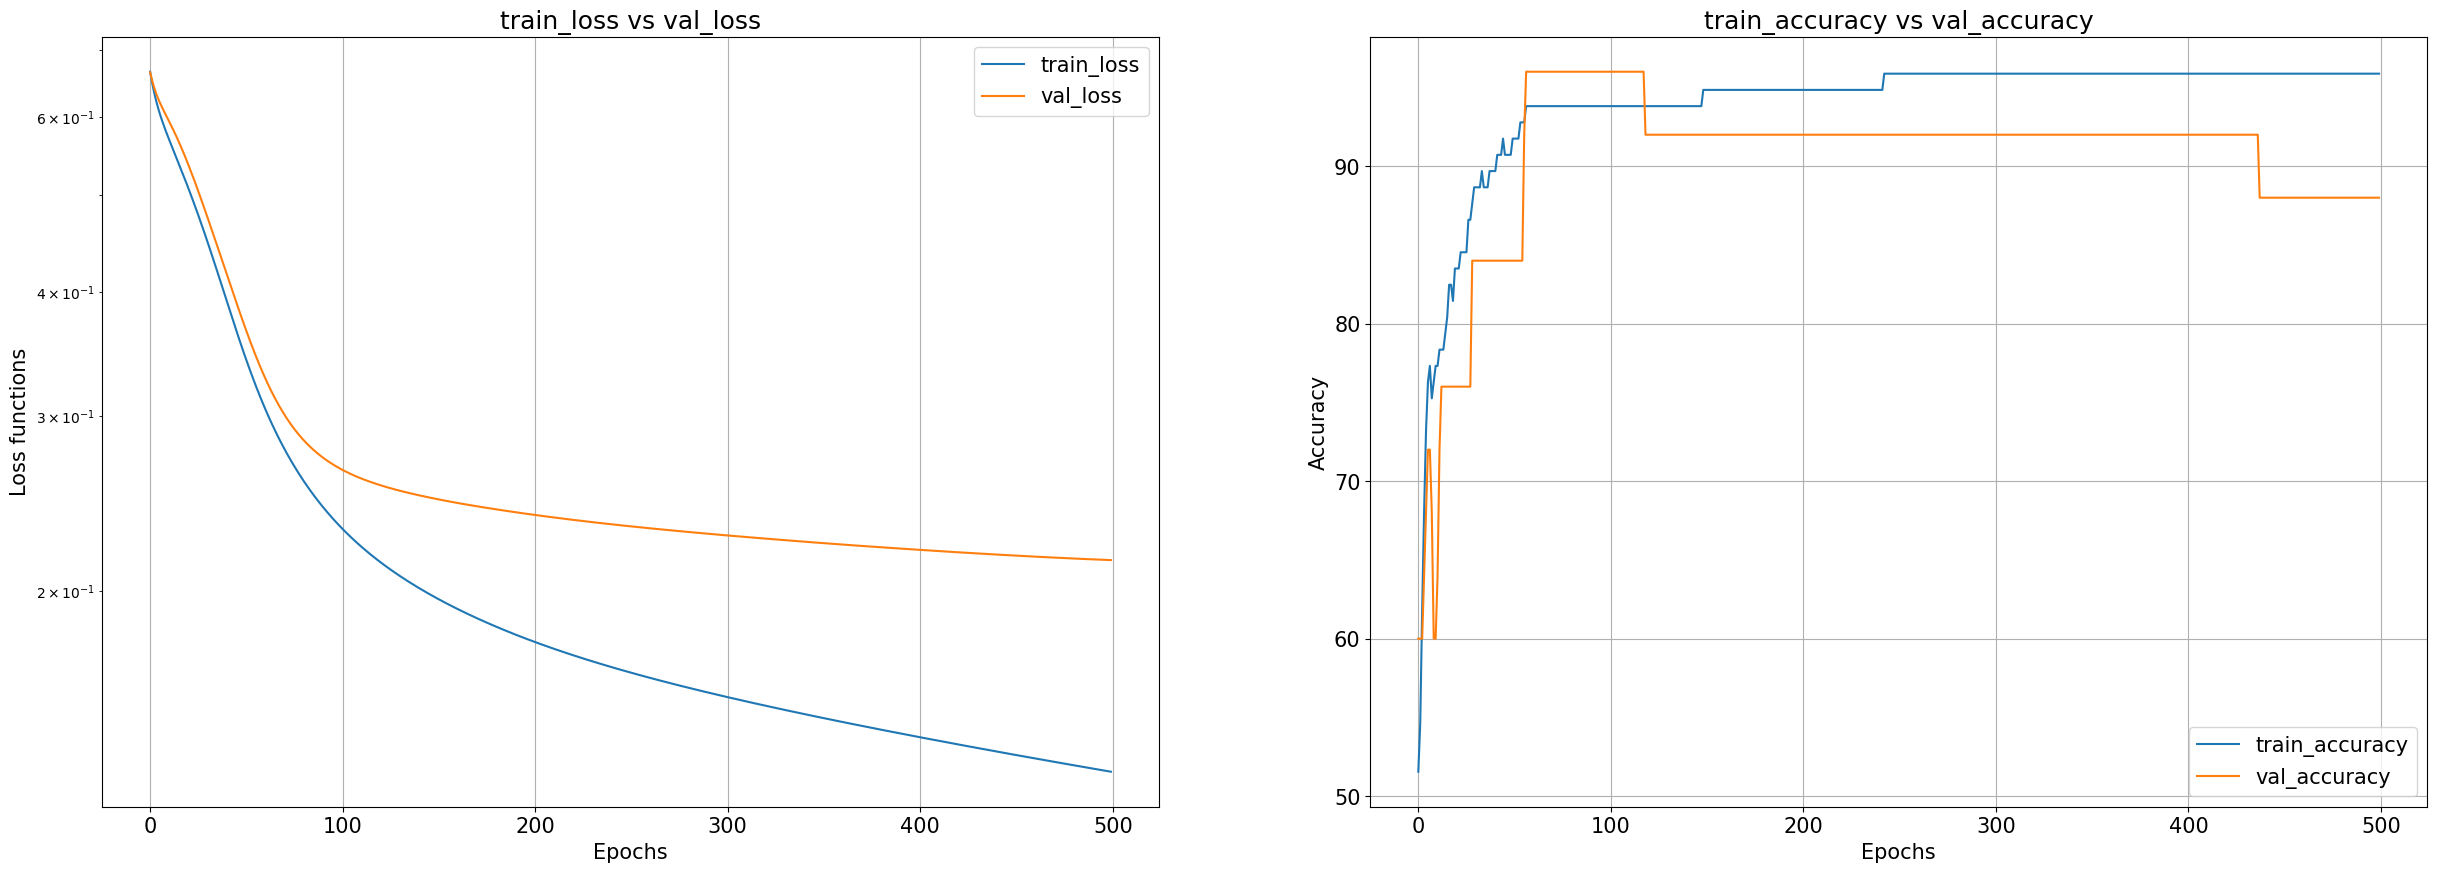

In [32]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l1['train_loss'],label='train_loss')
plt.plot(history_l1['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l1['train_accuracy'],label='train_accuracy')
plt.plot(history_l1['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

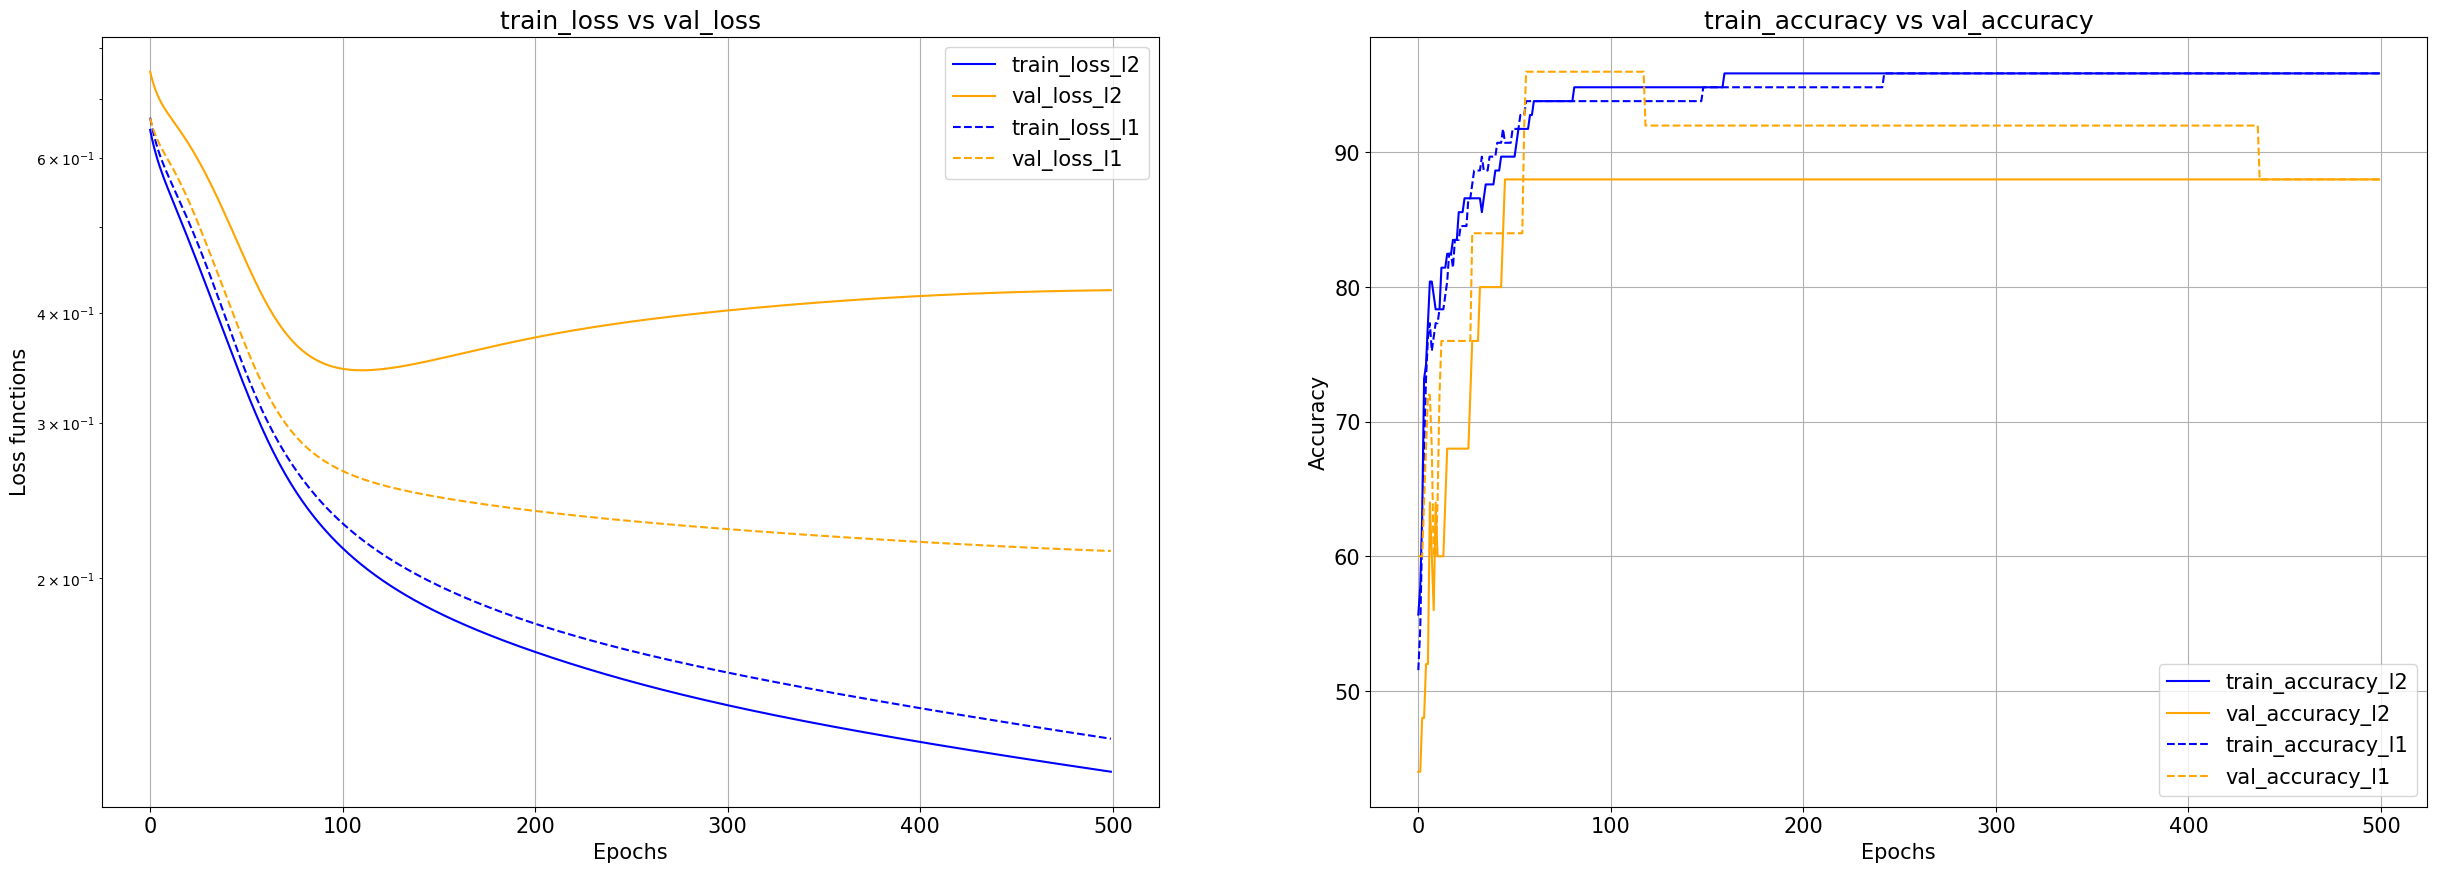

In [33]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l2['train_loss'], '-', label='train_loss_l2', color='blue')
plt.plot(history_l2['val_loss'], '-', label='val_loss_l2', color='orange')
plt.plot(history_l1['train_loss'], '--', label='train_loss_l1', color='blue')
plt.plot(history_l1['val_loss'], '--', label='val_loss_l1', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l2['train_accuracy'], '-',label='train_accuracy_l2', color='blue')
plt.plot(history_l2['val_accuracy'], '-', label='val_accuracy_l2', color='orange')
plt.plot(history_l1['train_accuracy'], '--', label='train_accuracy_l1', color='blue')
plt.plot(history_l1['val_accuracy'], '--', label='val_accuracy_l1', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.title('train_accuracy vs val_accuracy', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

## CUP

Define training and model hyperparameters

In [17]:
orig_params = {'hidden_dim': 50,
        'hidden_act_func': 'tanh',
        'hidden_dim2': 50,
        'hidden_act_func2' : 'tanh',
        'eta': 0.003,
        'lam': 0.0001,
        'alpha': 0.9,
        'n_batch': 150,
        'use_opt':0,
        'nest': True,
        'l1_reg' : False,
        'epochs' : 500,
        'loss' : 'MSE',
        'output_act_func': 'lin'
        }

### L2 regularization

Build model

In [18]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

init_weights_list = model.get_initial_weights_list()

Training with L2 regularization:

In [19]:
np.random.seed(42)
params['l1_reg'] = False
history_l2 = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 4.489e+02, val_loss: 4.608e+02; train_MEE: 3.134e+01, val_MEE: 3.125e+01  lr : 0.003
Epoch 1: train_loss: 1.689e+02, val_loss: 1.839e+02; train_MEE: 1.880e+01, val_MEE: 1.927e+01  lr : 0.003
Epoch 2: train_loss: 7.736e+01, val_loss: 8.697e+01; train_MEE: 1.298e+01, val_MEE: 1.359e+01  lr : 0.003
Epoch 3: train_loss: 4.550e+01, val_loss: 5.335e+01; train_MEE: 1.011e+01, val_MEE: 1.079e+01  lr : 0.003
Epoch 4: train_loss: 3.004e+01, val_loss: 3.536e+01; train_MEE: 8.007e+00, val_MEE: 8.567e+00  lr : 0.003
Epoch 5: train_loss: 2.121e+01, val_loss: 2.517e+01; train_MEE: 6.544e+00, val_MEE: 6.977e+00  lr : 0.003
Epoch 6: train_loss: 1.630e+01, val_loss: 1.964e+01; train_MEE: 5.599e+00, val_MEE: 6.046e+00  lr : 0.003
Epoch 7: train_loss: 1.360e+01, val_loss: 1.610e+01; train_MEE: 5.095e+00, val_MEE: 5.430e+00  lr : 0.003
Epoch 8: train_loss: 1.258e+01, val_loss: 1.471e+01; train_MEE: 5.077e+00, val_MEE: 5.360e+00  lr : 0.003
Epoch 9: train_loss: 1.103e+01, val_loss: 1.31

KeyboardInterrupt: 

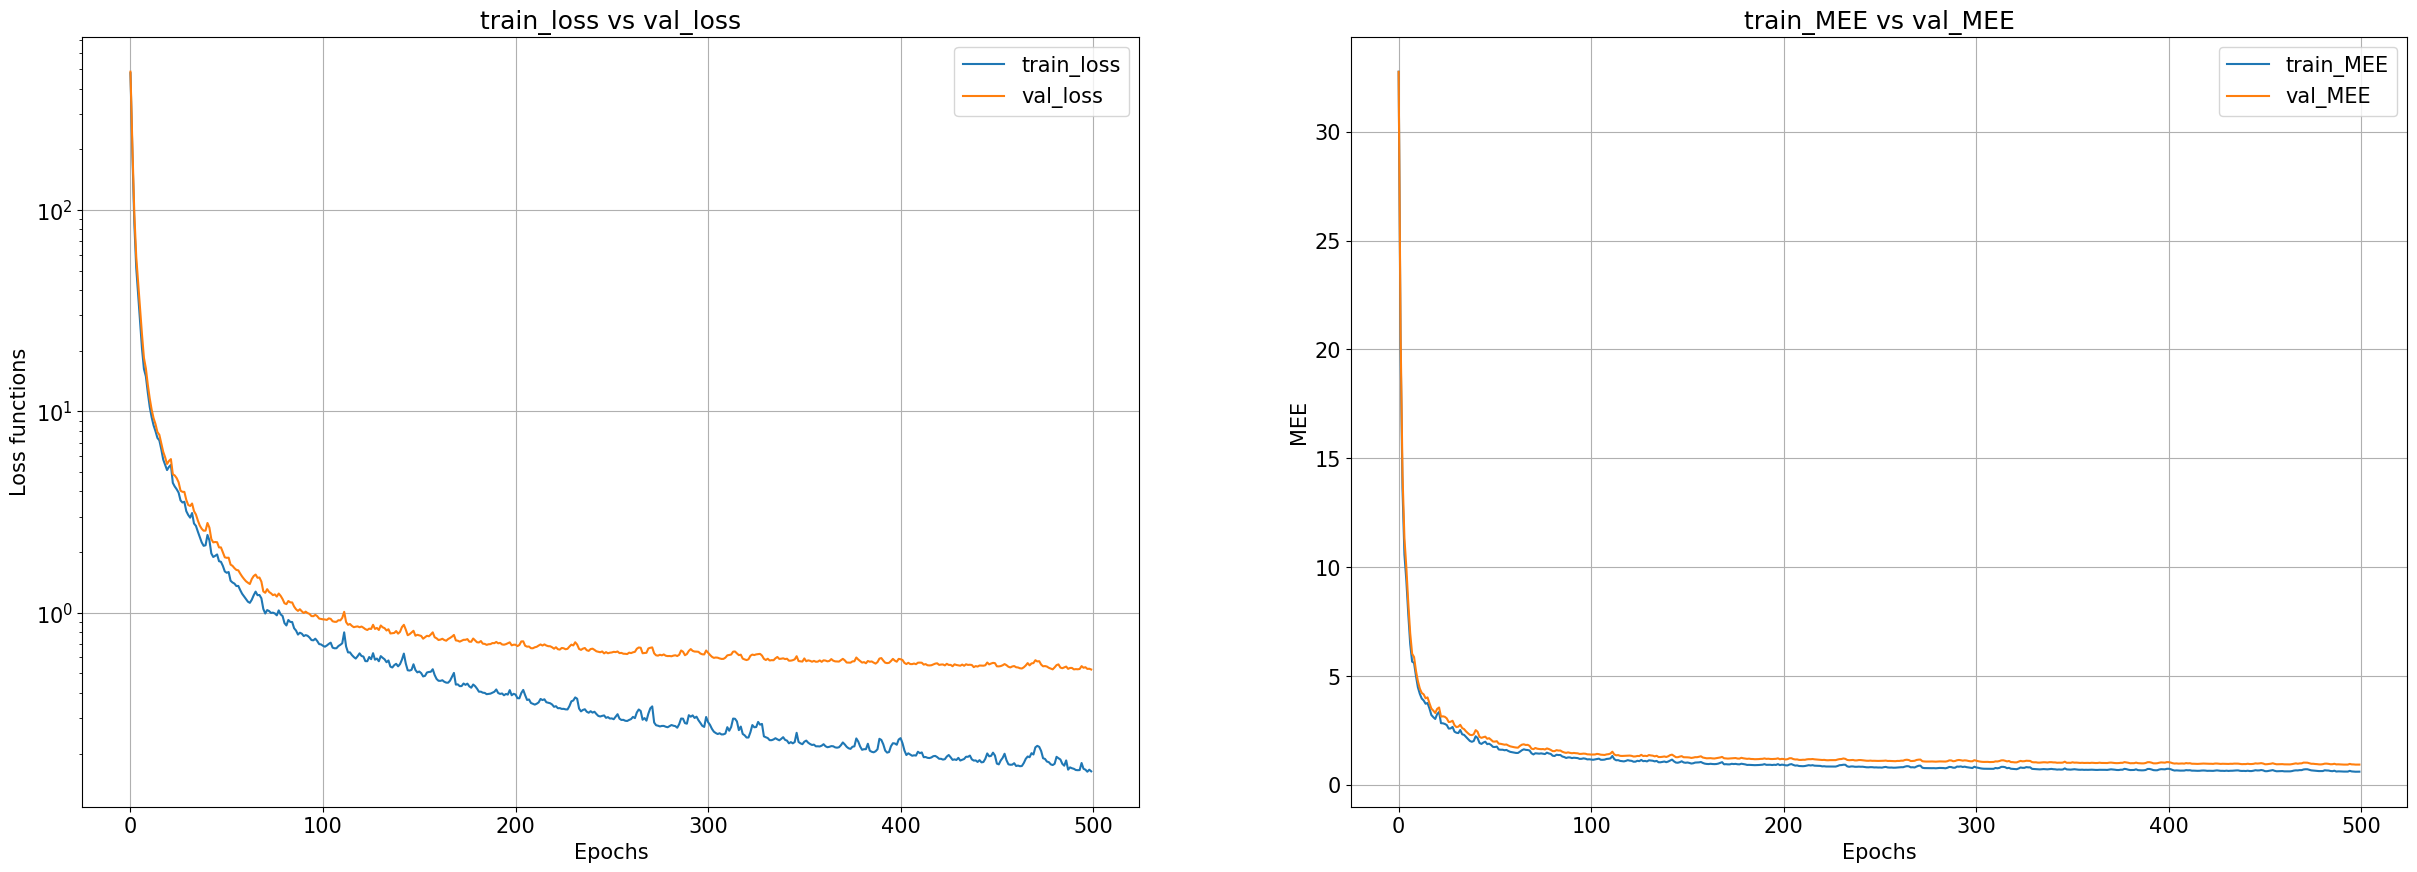

In [ ]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l2['train_loss'],label='train_loss')
plt.plot(history_l2['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l2['train_MEE'],label='train_MEE')
plt.plot(history_l2['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

### L1 regularization


Build model


In [ ]:
params = orig_params.copy()
input_layer = Input(X_train_cup.shape[0])
hidden_layer = Layer(input_layer, params.pop('hidden_dim'), params.pop('hidden_act_func'))
o = 2
while True:
    if f'hidden_dim{o}' in params.keys():
        hidden_layer = Layer(hidden_layer, params.pop(f'hidden_dim{o}'), params.pop(f'hidden_act_func{o}'))
        o += 1
    else: break
output_layer = Layer(hidden_layer, 3, params.pop('output_act_func'))

model = NeuralNetwork(input_layer, output_layer, params.pop('loss'), metrics=[MEE])

model.set_initial_weights(init_weights_list)

Training with L1 regularization:


In [ ]:
np.random.seed(42)
params['l1_reg'] = True
history_l1 = model.train(X_train_cup, y_train_cup,
                                    ** params,
                                    validation_split = 0.2,
                                    early_stopping=None,
                                    reduce_eta=None
                                    )

Epoch 0: train_loss: 4.773e+02, val_loss: 4.851e+02; train_MEE: 3.276e+01, val_MEE: 3.276e+01  lr : 0.003
Epoch 1: train_loss: 1.921e+02, val_loss: 2.066e+02; train_MEE: 2.022e+01, val_MEE: 2.079e+01  lr : 0.003
Epoch 2: train_loss: 8.626e+01, val_loss: 9.589e+01; train_MEE: 1.361e+01, val_MEE: 1.427e+01  lr : 0.003
Epoch 3: train_loss: 5.152e+01, val_loss: 5.845e+01; train_MEE: 1.059e+01, val_MEE: 1.133e+01  lr : 0.003
Epoch 4: train_loss: 3.807e+01, val_loss: 4.356e+01; train_MEE: 9.388e+00, val_MEE: 9.982e+00  lr : 0.003
Epoch 5: train_loss: 2.781e+01, val_loss: 3.215e+01; train_MEE: 7.846e+00, val_MEE: 8.350e+00  lr : 0.003
Epoch 6: train_loss: 2.041e+01, val_loss: 2.395e+01; train_MEE: 6.473e+00, val_MEE: 6.960e+00  lr : 0.003
Epoch 7: train_loss: 1.623e+01, val_loss: 1.841e+01; train_MEE: 5.659e+00, val_MEE: 6.024e+00  lr : 0.003
Epoch 8: train_loss: 1.491e+01, val_loss: 1.634e+01; train_MEE: 5.606e+00, val_MEE: 5.869e+00  lr : 0.003
Epoch 9: train_loss: 1.240e+01, val_loss: 1.35

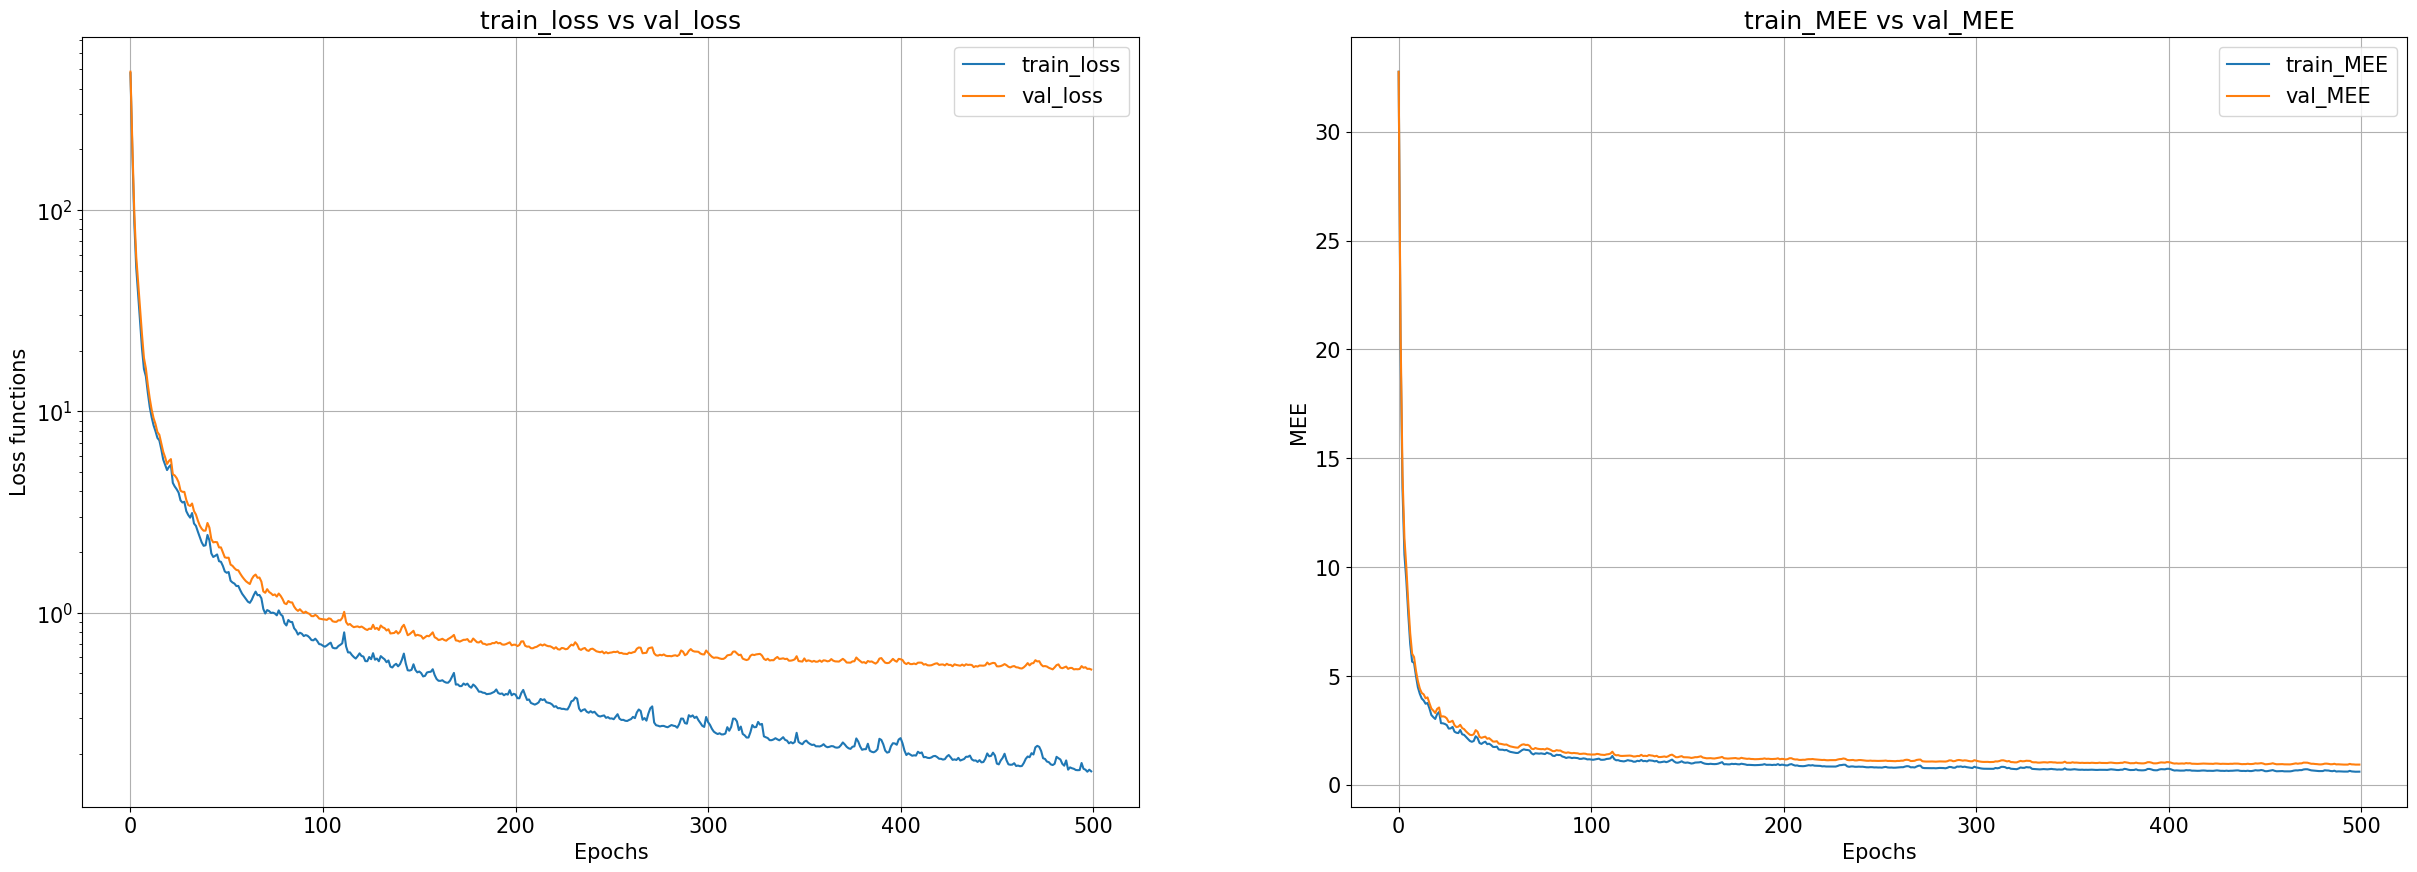

In [ ]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l1['train_loss'],label='train_loss')
plt.plot(history_l1['val_loss'], label='val_loss')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l1['train_MEE'],label='train_MEE')
plt.plot(history_l1['val_MEE'], label='val_MEE')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)


### Comparison

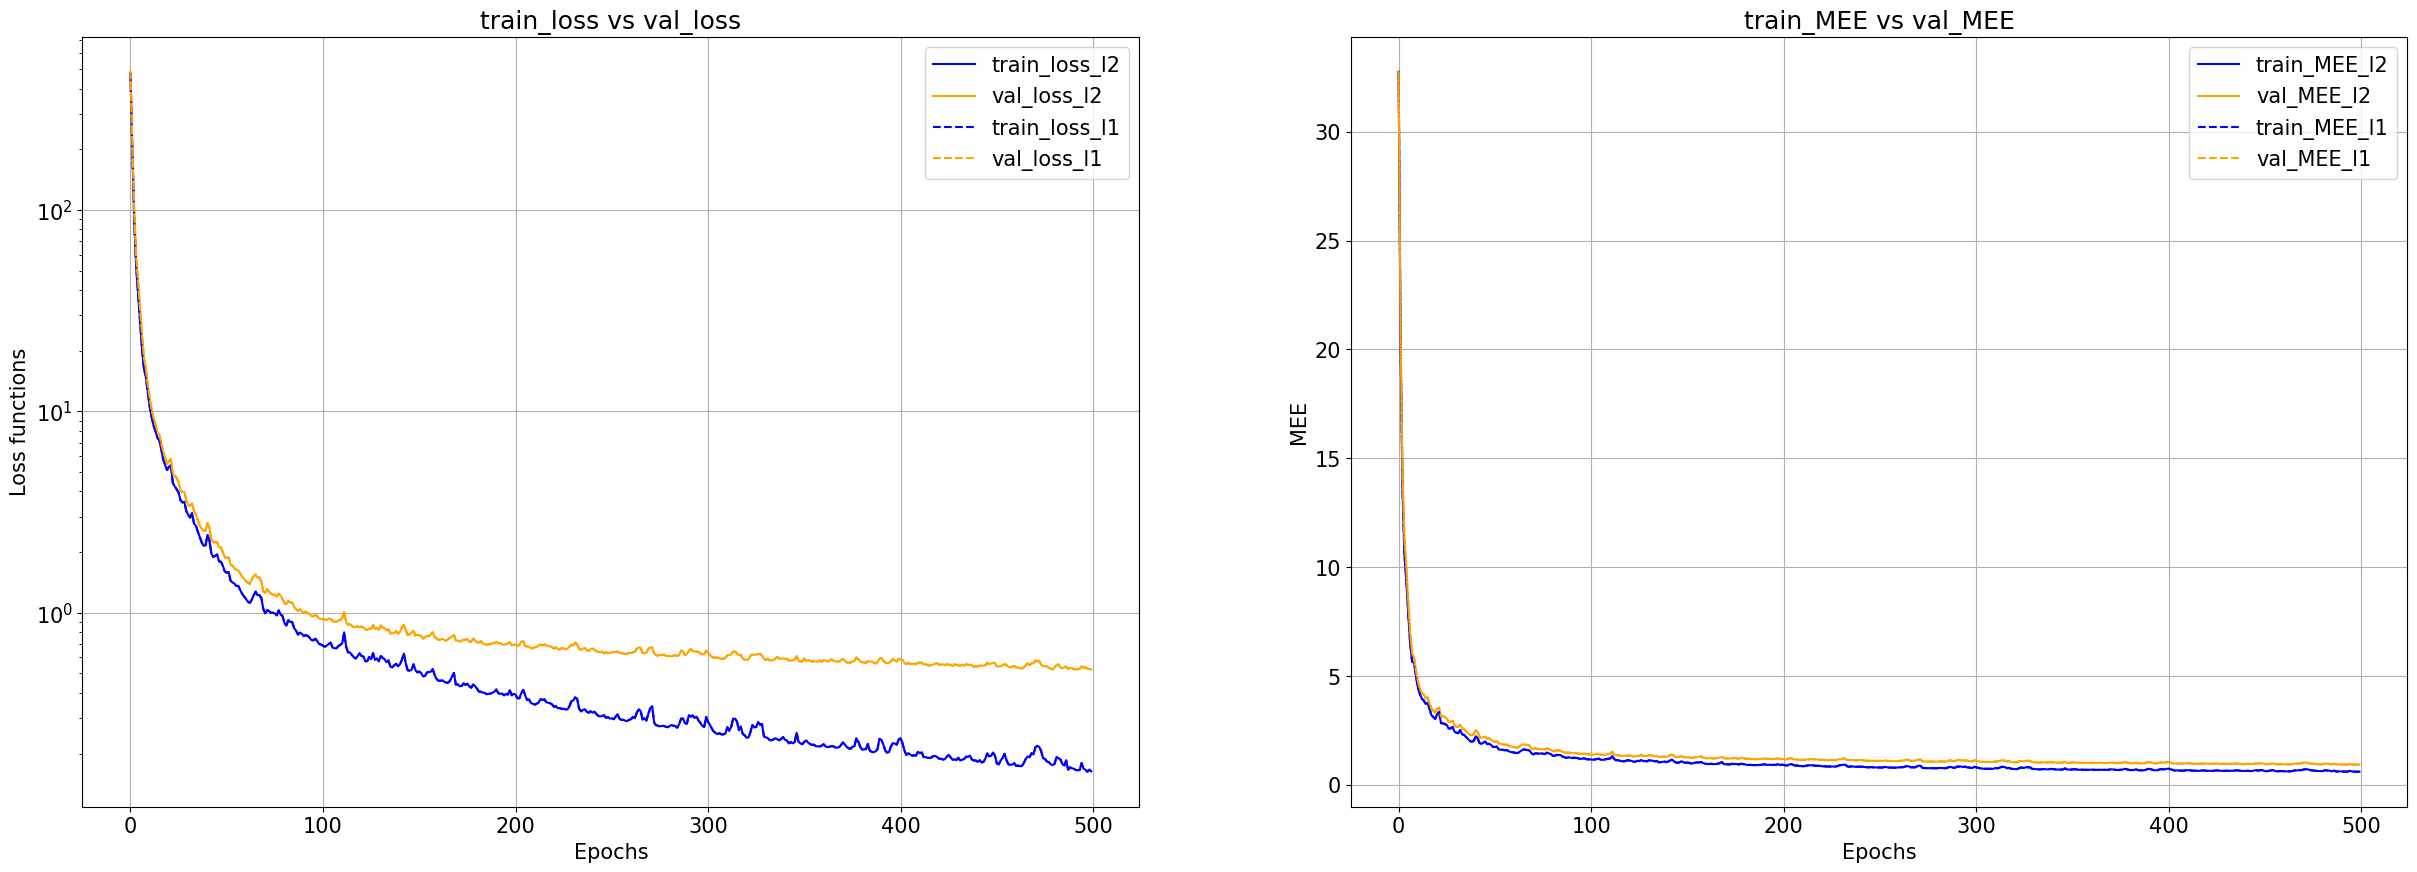

In [ ]:
plt.figure(1,figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(history_l2['train_loss'], '-', label='train_loss_l2', color='blue')
plt.plot(history_l2['val_loss'], '-', label='val_loss_l2', color='orange')
plt.plot(history_l1['train_loss'], '--', label='train_loss_l1', color='blue')
plt.plot(history_l1['val_loss'], '--', label='val_loss_l1', color='orange')
plt.yscale('log')
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss functions', size=15)
plt.title('train_loss vs val_loss', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(history_l2['train_MEE'], '-',label='train_MEE_l2', color='blue')
plt.plot(history_l2['val_MEE'], '-', label='val_MEE_l2', color='orange')
plt.plot(history_l1['train_MEE'], '--', label='train_MEE_l1', color='blue')
plt.plot(history_l1['val_MEE'], '--', label='val_MEE_l1', color='orange')
plt.xlabel('Epochs', size=15)
plt.ylabel('MEE', size=15)
plt.title('train_MEE vs val_MEE', size=18)
plt.xticks(size=15)
plt.yticks(size=15)
plt.grid()
plt.legend(fontsize=15)

## CUP